<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Spring 2022<br>
            Dr. Eric Van Dusen <br>
        Sreeja Apparaju</p></td></tr>
</table>

## This notebook takes a look at some simple tools for looking at the stock market
 - Previously Yahooo finance had a free API for reading in historical data on stocks
 - However the Yahoo API got discontiued
 - An awesome quant made a python package that recreated this functionality by scraping the information
 
Check out the documentation for [Yfinance package](https://pypi.org/project/yfinance/)

 The package - called yfinance is not on the datahub so first we need to install it

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy import stats
import warnings
from datascience import *
warnings.filterwarnings('ignore')
plt.style.use("seaborn-muted")
%matplotlib inline

The yfinance package allows us to download by stock ticker and make a Pandas Dataframe - here we will pull in by the market-wide tickers for the S&P 500 and the Nasdaq

In [3]:
data_SPNQ = yf.download(("^GSPC", '^IXIC'), start="1993-01-29", end="2022-04-05")


[*********************100%***********************]  2 of 2 completed


The following section uses the dataframe to build out a new dataframe with returns - the amount earned each day on the previous days close

In [4]:
data_SN = data_SPNQ.iloc[:, [2,3]]
data_SP =data_SPNQ.iloc[:, 0]
data_NQ = data_SPNQ.iloc[:, 1]
dSP = np.array(len(data_SP)-1)
for i in range(len(data_SP)-1):
    dat = ((data_SP[i] - data_SP[i+1])/data_SP[i])*100
    dSP = np.append(dSP,dat)
dNQ = np.array(len(data_NQ)-1)
for i in range(len(data_NQ)-1):
    dat = ((data_NQ[i] - data_NQ[i+1])/data_NQ[i])*100
    dNQ = np.append(dNQ,dat)
data_SN['SP Returns'] = dSP
data_SN['NQ Returns'] = dNQ

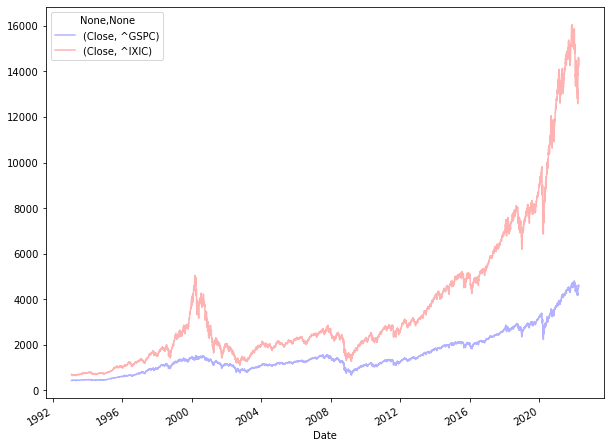

In [5]:
data_SN.iloc[:,[0,1]].plot(color = ('blue', 'red'), figsize=(10,8), alpha =0.3);


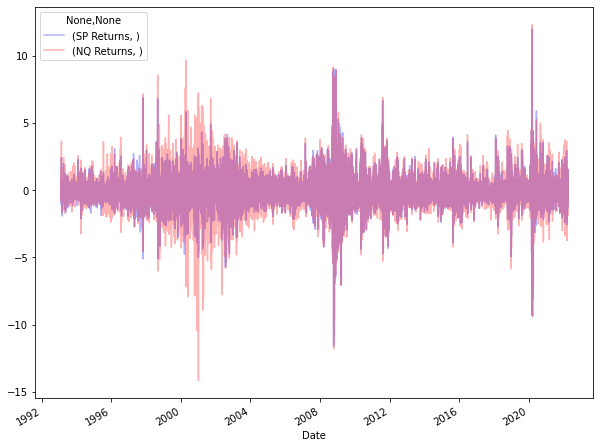

In [6]:
data_SN[['SP Returns', 'NQ Returns']].iloc[1:].plot(color = ('blue', 'red'), figsize=(10,8), alpha = 0.3);


## QuantStats Package
The same developer made a more recent package that draws on Yfinance but makes a whole set of summary tables 

Check out the documentation for the [QuantStats Package](https://pypi.org/project/QuantStats/)

First install the package

In [8]:
!pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 KB 894.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 KB 1.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.1.64
    Uninstalling yfinance-0.1.64:
      Successfully uninstalled yfinance-0.1.64
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.


In [9]:
import quantstats as qs

# fetch the daily returns for a stock - here for example Facebook
stock = qs.utils.download_returns('FB')

# show sharpe ratio
qs.stats.sharpe(stock)

0.6533966690923346

### QuantStats can make a "Snapshot" of stock performance

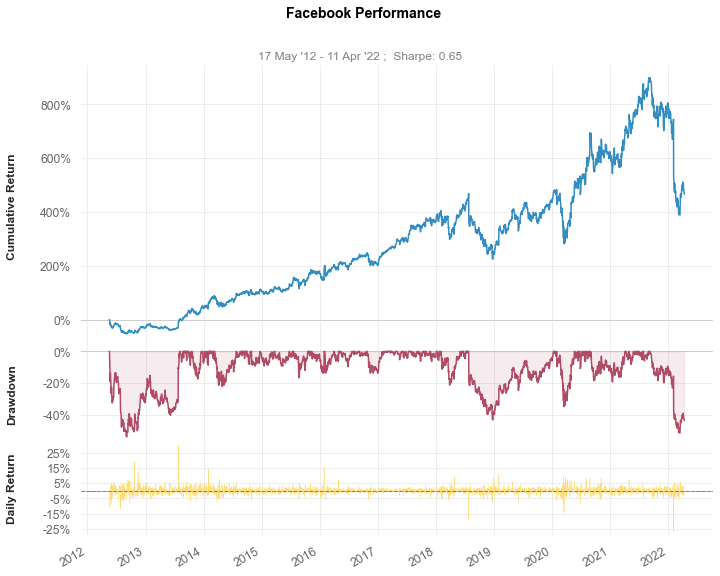

In [10]:
qs.plots.snapshot(stock, title='Facebook Performance')

### QuantStats can also make a more extensive analysis of stock performance -
and here compared to a Benchmark Index - SP 500

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2012-05-18  2012-05-18
End Period                 2022-04-11  2022-04-11
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          466.2%      310.32%
CAGR﹪                     19.13%      15.32%

Sharpe                     0.65        0.95
Smart Sharpe               0.64        0.93
Sortino                    0.96        1.33
Smart Sortino              0.93        1.29
Sortino/√2                 0.68        0.94
Smart Sortino/√2           0.66        0.92
Omega                      1.13        1.13

Max Drawdown               -53.62%     -33.72%
Longest DD Days            532         272
Volatility (ann.)          37.8%       16.42%
R^2                        0.24        0.24
Calmar                     0.36        0.45
Skew                       0.28        -0.66
Kurtosis                   21.71      

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2012-05-21,2012-09-04,2013-08-05,441,-53.622810,-50.405443
2,2021-09-08,2022-03-14,2022-04-11,215,-51.166987,-50.910565
3,2018-07-26,2018-12-24,2020-01-09,532,-42.960921,-39.434485
4,2020-01-30,2020-03-16,2020-05-20,111,-34.592126,-34.166550
5,2014-03-11,2014-04-28,2014-07-24,135,-22.060252,-21.213382


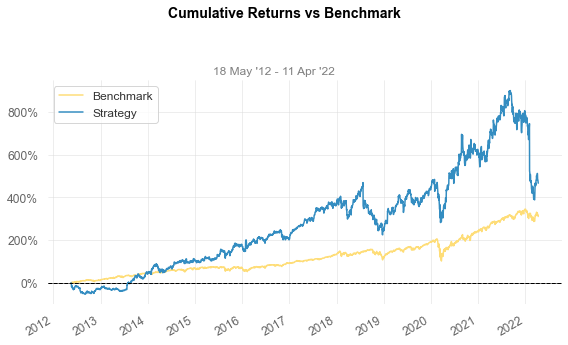

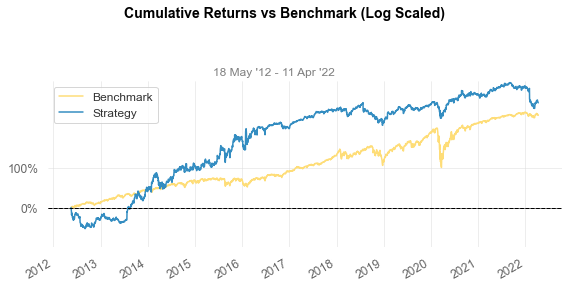

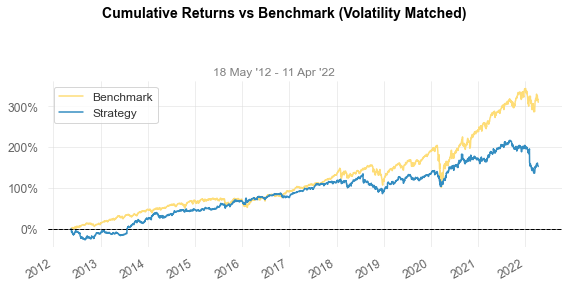

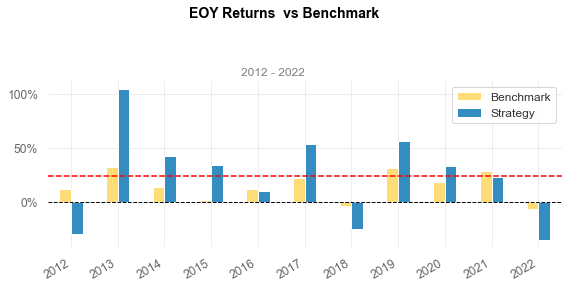

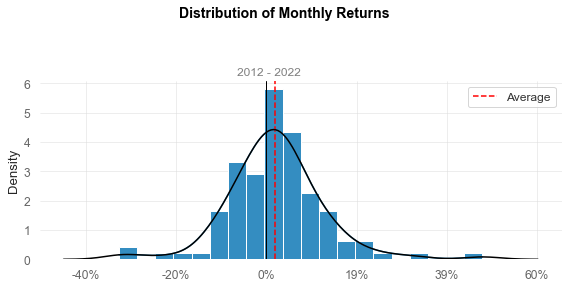

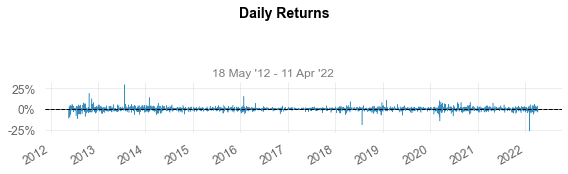

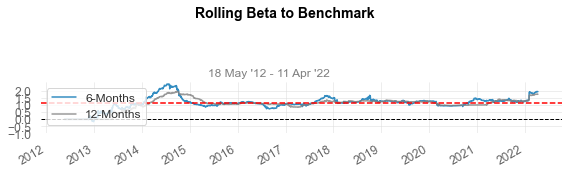

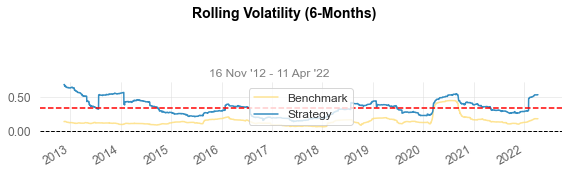

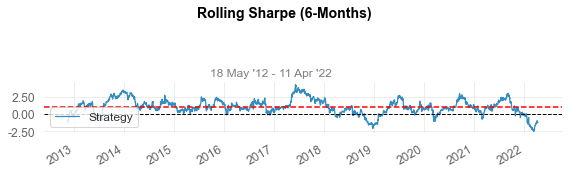

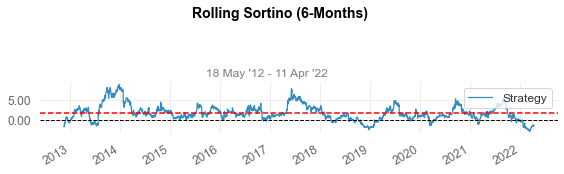

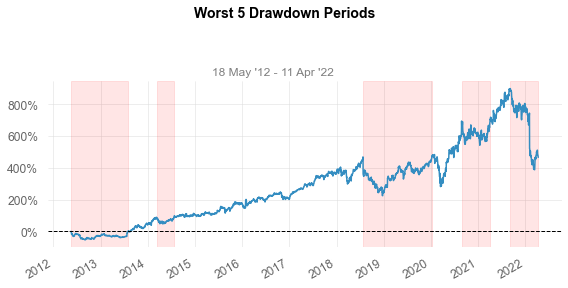

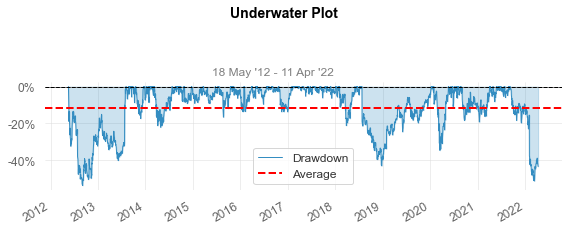

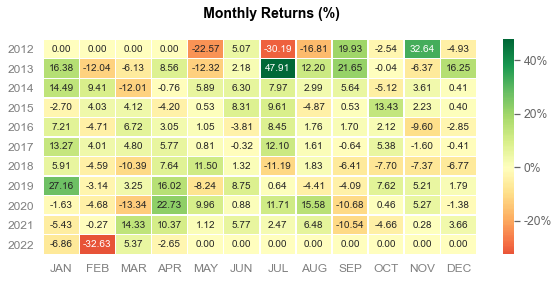

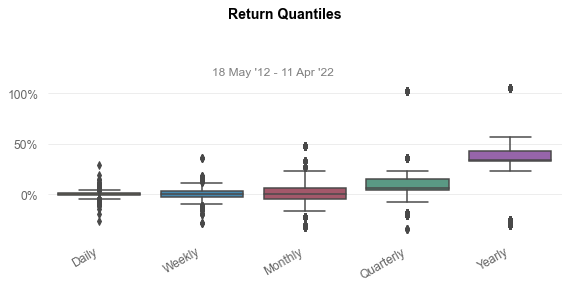

In [11]:
qs.reports.full(stock, "SPY")
